In [2]:
from PIL import Image
from ultralytics import model

Use Yolov8 [documentation](https://docs.ultralytics.com/models/yolov8/).

In [2]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [3]:
model = YOLO('yolov8n.pt')

In [4]:
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [5]:
n = 2
images = [f'datasets/4_annotate_1min_bodo_start/img1/{number:06d}.jpg' for number in range(1, n)]
results = model(images, conf=.1, iou=.6)


0: 384x640 16 persons, 267.8ms
Speed: 27.2ms preprocess, 267.8ms inference, 5578.6ms postprocess per image at shape (1, 3, 384, 640)


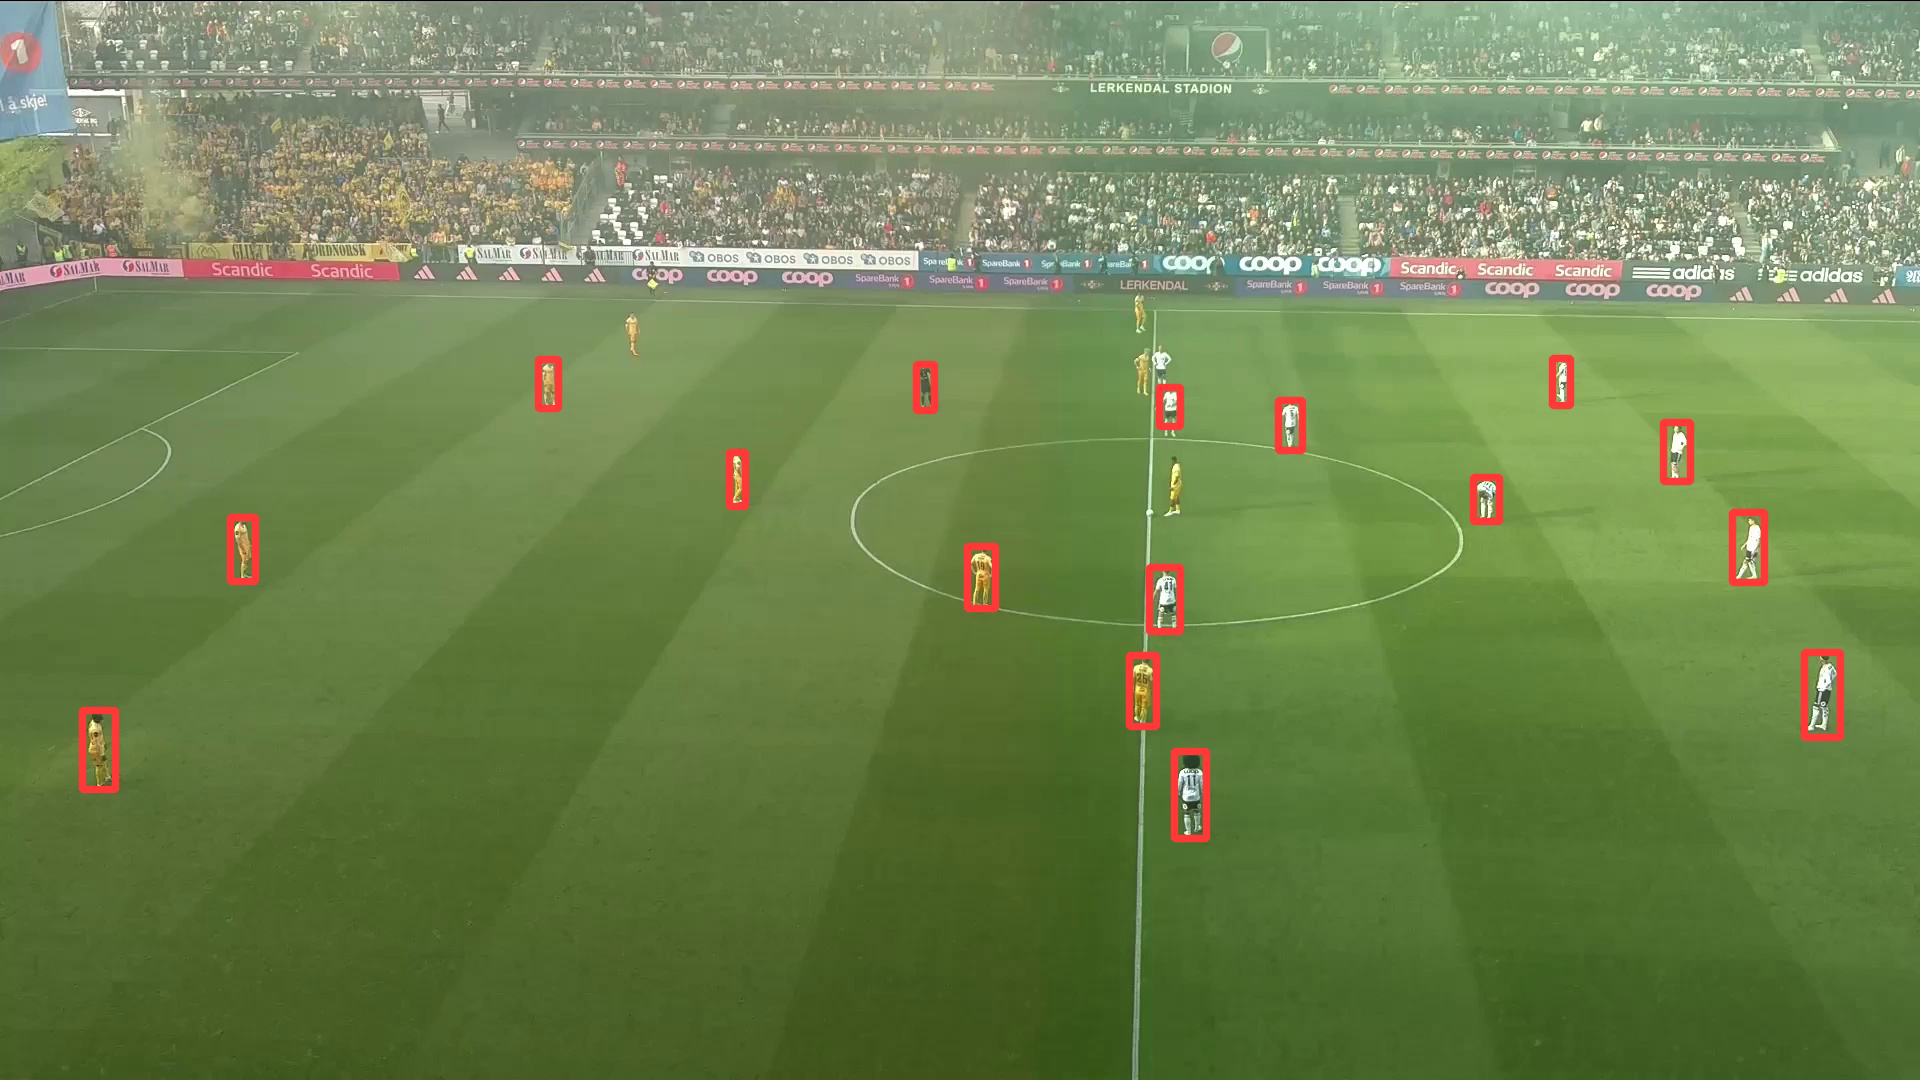

In [6]:
im_bgr = results[0].plot(labels=False)
Image.fromarray(im_bgr[..., ::-1])

In [38]:
results[0].save(filename='result2.jpg')

'result2.jpg'

In [6]:
# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    # r.save(filename=f'output/results{i}.jpg')

## Train

In [7]:
results = model.train(data='config.yaml', epochs=5)#, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.1 🚀 Python-3.11.5 torch-2.2.1 CPU (Intel Core(TM) i5-5350U 1.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

Fontconfig warning: ignoring UTF-8: not a valid region tag


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /Users/marijansoric/Desktop/NTNU/deep learning/datasets/try_data/labels/train... 1703 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1703/1703 [00:04<00:00, 424.43it/s]


train: New cache created: /Users/marijansoric/Desktop/NTNU/deep learning/datasets/try_data/labels/train.cache


val: Scanning /Users/marijansoric/Desktop/NTNU/deep learning/datasets/try_data/labels/val... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<00:00, 416.92it/s]

val: New cache created: /Users/marijansoric/Desktop/NTNU/deep learning/datasets/try_data/labels/val.cache


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train10
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.967      4.117     0.9694        628        640:   2%|▏         | 2/107 [01:32<1:20:52, 46.22s/it]


KeyboardInterrupt: 

# Tracking

In [7]:
results = model.track(source=0, show=True, tracker="bytetrack.yaml")

requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
Retry 1/2 failed: 
requirements: AutoUpdate success ✅ 7.4s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



ModuleNotFoundError: No module named 'lap'

In [1]:
from PIL import Image

def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height

# Example usage:
image_path = "datasets/1_train-val_1min_aalesund_from_start/img1/000001.jpg"
width, height = get_image_size(image_path)
print("Image width:", width)
print("Image height:", height)


Image width: 1920
Image height: 1080
